In [24]:
import pandas as pd

# Decision tree Regression

## Data loading and preprocesing

In [91]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [92]:
df = df.drop(columns=["Formatted Date", 
                      "Daily Summary", 
                      "Summary",
                     "Cloud Cover",
                     "Apparent Temperature (C)"])

In [93]:
one_hot_encoded = pd.get_dummies(df["Precip Type"])
one_hot_encoded.describe()

,rain,snow
count,96453.000000,96453.000000
mean,0.883581,0.111059
std,0.320729,0.314207
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [94]:
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop(columns=["Precip Type"])
print(df.dtypes)

Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
rain                        uint8
snow                        uint8
dtype: object


In [95]:
print(df.dtypes)

Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
rain                        uint8
snow                        uint8
dtype: object


In [96]:
df.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),rain,snow
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956,0.883581,0.111059
std,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906,0.320729,0.314207
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000,1.000000,0.000000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,1.000000,0.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,1.000000,0.000000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000,1.000000


In [97]:
X = df.drop(columns=["Temperature (C)"])
y = pd.DataFrame(df["Temperature (C)"])

In [98]:
X

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),rain,snow
0,0.89,14.1197,251.0,15.8263,1015.13,1,0
1,0.86,14.2646,259.0,15.8263,1015.63,1,0
2,0.89,3.9284,204.0,14.9569,1015.94,1,0
3,0.83,14.1036,269.0,15.8263,1016.41,1,0
4,0.83,11.0446,259.0,15.8263,1016.51,1,0
...,...,...,...,...,...,...,...
96448,0.43,10.9963,31.0,16.1000,1014.36,1,0
96449,0.48,10.0947,20.0,15.5526,1015.16,1,0
96450,0.56,8.9838,30.0,16.1000,1015.66,1,0
96451,0.60,10.5294,20.0,16.1000,1015.95,1,0


In [99]:
y

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=10, criterion="squared_error", random_state=1111)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=1111)

## Model evaluation

In [102]:
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

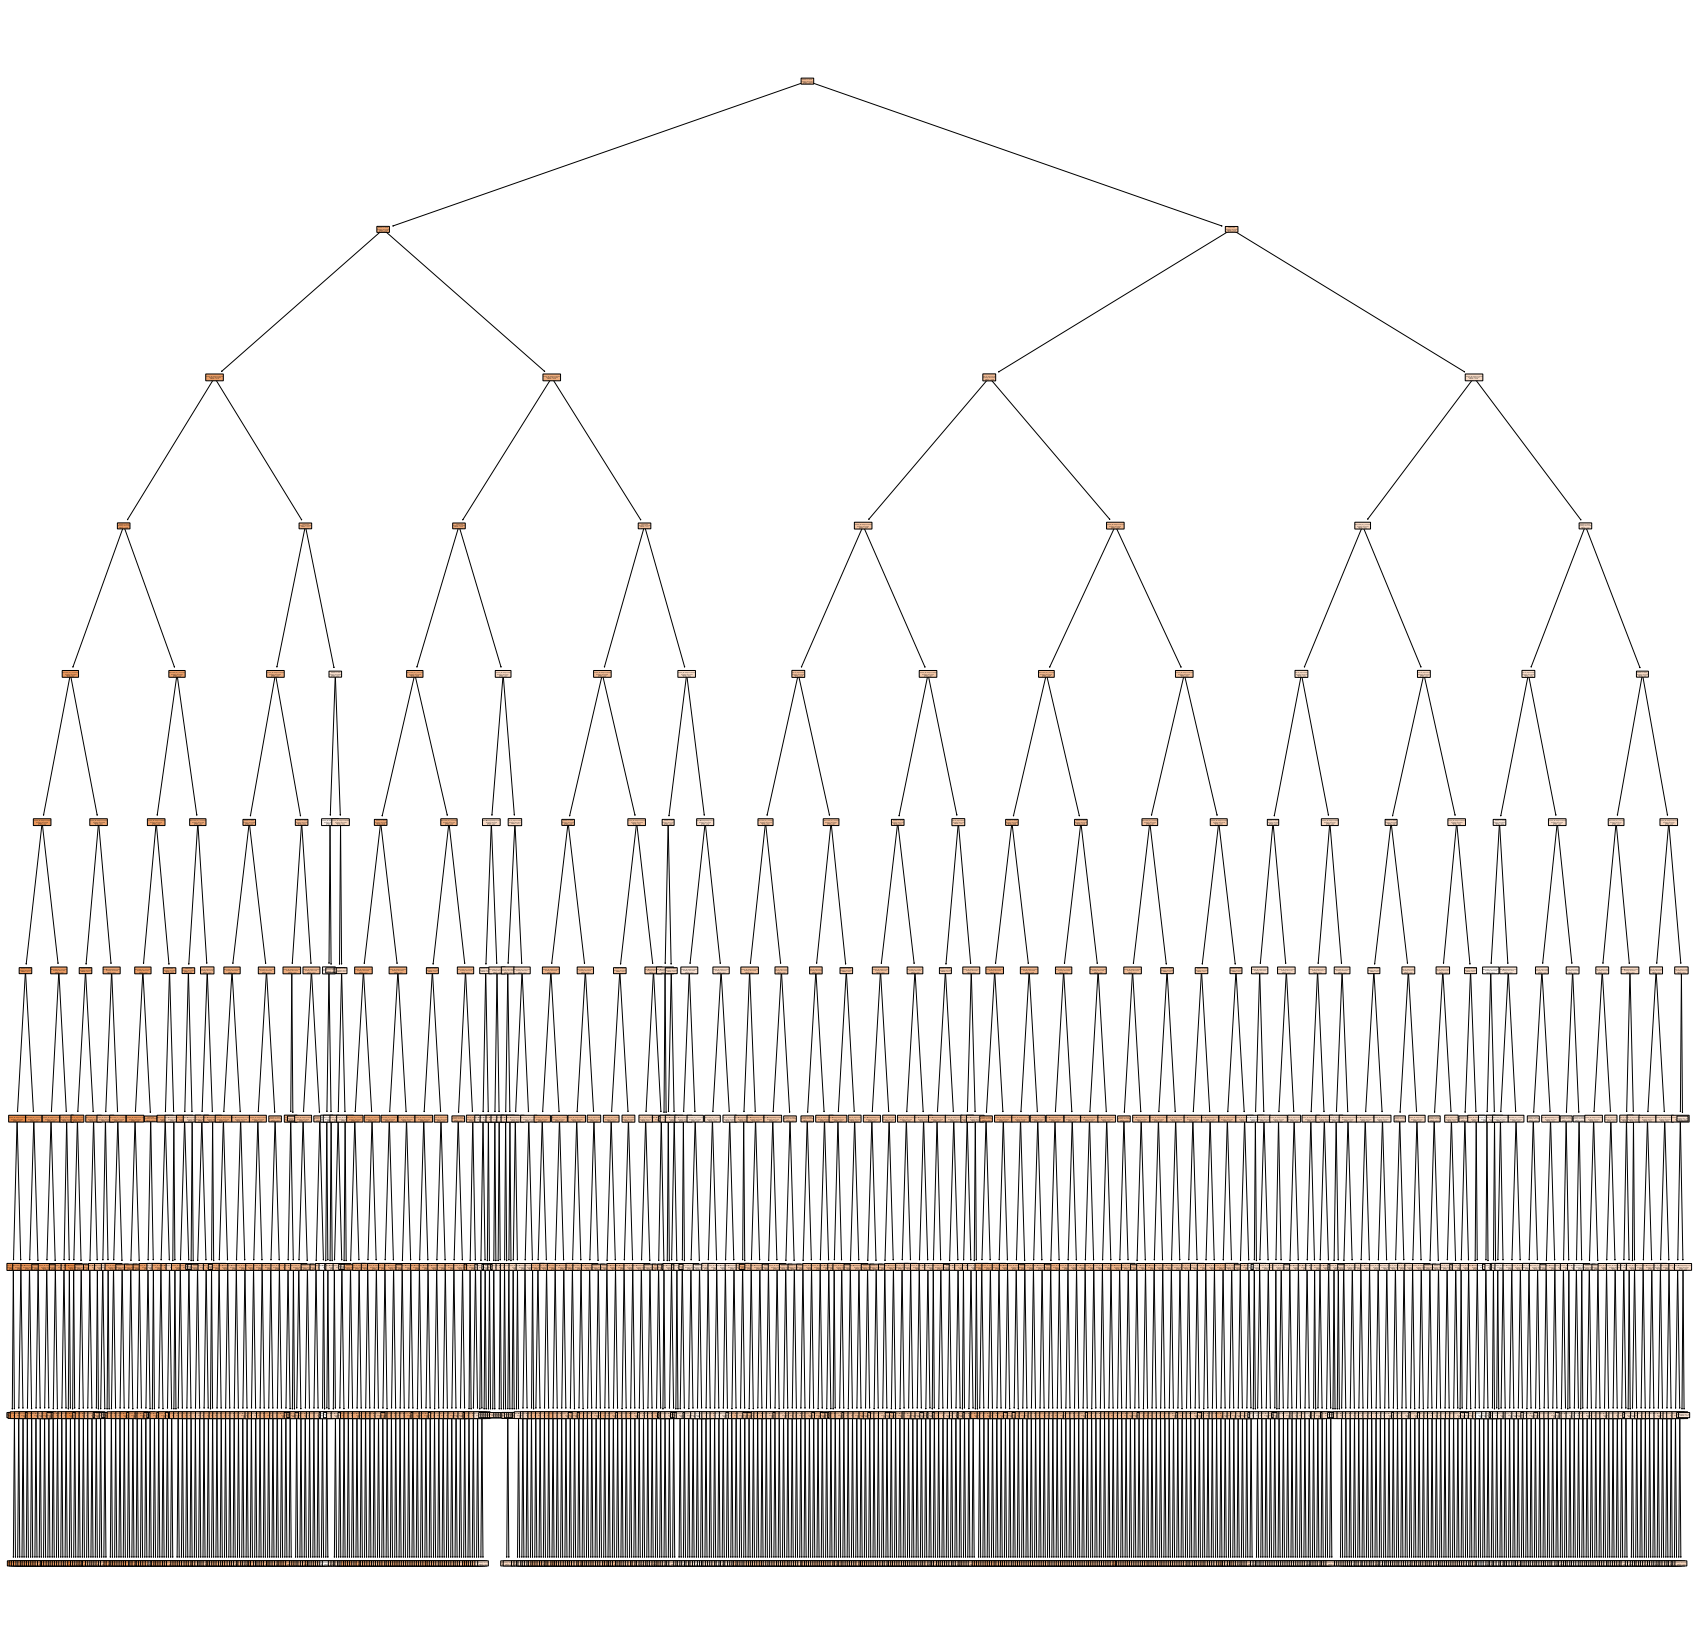

In [103]:

plt.figure(figsize=(30,30))
_ = plot_tree(tree,
              feature_names=X_test.keys(),
              filled=True,
              proportion=True,
              rounded=True
             )

plt.show()


In [104]:
y_hat = tree.predict(X_test)

In [105]:
R2 = r2_score(y_true=y_test, y_pred=y_hat).round(2)
exp_var = explained_variance_score(y_true=y_test, y_pred=y_hat).round(2)

In [106]:
print(R2)
print(exp_var)

0.71
0.71


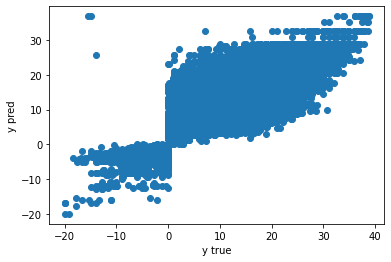

In [109]:
y_hat = tree.predict(X_test)
plt.figure()
plt.scatter(y_test,y_hat)
plt.xlabel("y true")
plt.ylabel("y pred")
plt.show()

## Partial Dependence Plot

In [47]:
from sklearn.inspection import PartialDependenceDisplay

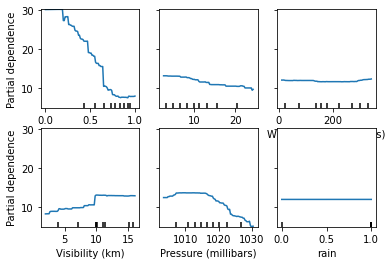

In [48]:
features = [0,1,2,3,4,5]
# plt.figure(figsize=(10,10))
PartialDependenceDisplay.from_estimator(tree, X_test, features)

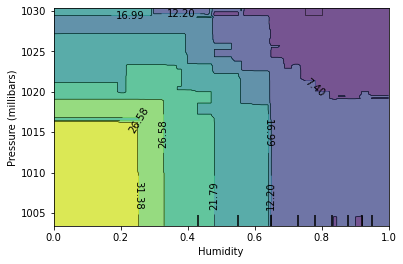

In [49]:
features = [(0,4)]
PartialDependenceDisplay.from_estimator(tree, X_test, features)

# Decision Tree Classifier

## Data Preprocessing

In [53]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [54]:
df = df.drop(columns=["Formatted Date", 
                      "Daily Summary", 
                      "Summary",
                     "Cloud Cover",
                     "Apparent Temperature (C)"])

In [55]:
df["Precip Type"].isnull().sum()

517

In [56]:
df["Precip Type"].fillna("none", inplace=True)

In [57]:
pd.get_dummies(df["Precip Type"])

,none,rain,snow
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
96448,0,1,0
96449,0,1,0
96450,0,1,0
96451,0,1,0


In [58]:
df.dtypes

Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
dtype: object

In [59]:
X = df.drop(columns=["Precip Type"])

y = df["Precip Type"].astype('category').cat.codes

class_names = df["Precip Type"].astype('category').cat.categories

In [60]:
print(X.shape)
print(y.shape)
print(class_names)

(96453, 6)
(96453,)
Index(['none', 'rain', 'snow'], dtype='object')


In [61]:
y.describe()

count    96453.000000
mean         1.105699
std          0.324420
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
dtype: float64

In [62]:
X.dtypes

Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
Pressure (millibars)      float64
dtype: object

In [63]:
y.dtypes

dtype('int8')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

## Model training

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
tree_classifier = DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

## Model evaluation

In [81]:
y_hat = tree_classifier.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, log_loss
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [85]:
acc = accuracy_score(y_true=y_test, y_pred=y_hat).round(2)

rec = recall_score(y_true=y_test, y_pred=y_hat, average=None).round(2)

f1  = f1_score(y_true=y_test, y_pred=y_hat, average=None).round(2)

In [86]:
print(f"Accuracy: {acc}, recall: {rec}, f1 score: {f1}")

Accuracy: 0.99, recall: [0. 1. 1.], f1 score: [0. 1. 1.]


In [87]:
list(X_train.keys())

['Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

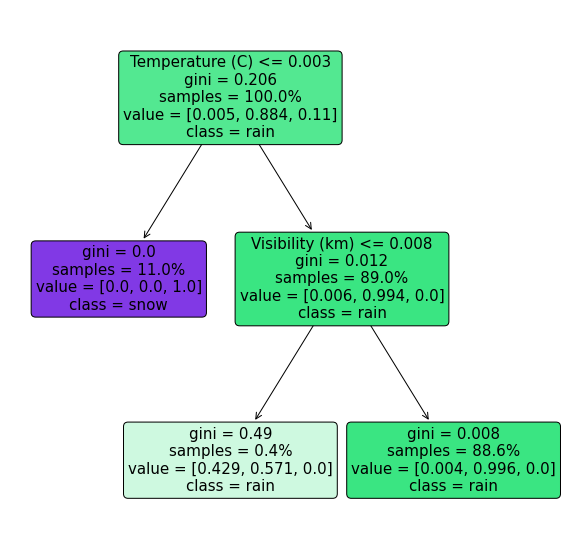

In [88]:
plt.figure(figsize=(10,10))
plot_tree(tree_classifier, 
          class_names=class_names,
          feature_names=X_test.keys(),
          filled=True,
          proportion=True,
          rounded=True)
plt.show()